# Statistics Introduction Applied to Data Science
## Bonus : Two - Time Series
### Indexing and Resampling Time Series

In [1]:
# Libraries needs
%matplotlib inline

import matplotlib.pyplot as plt
import numpy    as np
import pandas   as pd
import datetime as dt

In [2]:
df = pd.read_csv('DailyDelhiClimateTrain.csv', sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [4]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
# Pass a data column or series to to_datetime() function, and it will parse the string as datetime64 type.
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [6]:
# Now, you can use repaired column as index using set_index.
# The resulting DateTimeIndex lets you treat the entire DataFrame as time series data.
df.set_index('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


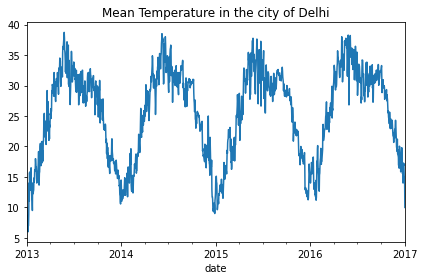

In [7]:
# Plotting mean temperature time series
# It will show you that with a DateTimeIndex, pandas automatically create reasonably spaced date labels for the x axis.

df.meantemp.plot(title='Mean Temperature in the city of Delhi')
plt.tight_layout()
plt.show()

## Partial string indexig

In [8]:
# if you pass a string representing a year, pandas returns all dates within this year.
df['2016'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2016-01-01 to 2016-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      366 non-null    float64
 1   humidity      366 non-null    float64
 2   wind_speed    366 non-null    float64
 3   meanpressure  366 non-null    float64
dtypes: float64(4)
memory usage: 14.3 KB


In [9]:
# if we pass a slice that starts with one month and ends to another, you get all dates within that range
df['2016-4':'2017-1'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276 entries, 2016-04-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      276 non-null    float64
 1   humidity      276 non-null    float64
 2   wind_speed    276 non-null    float64
 3   meanpressure  276 non-null    float64
dtypes: float64(4)
memory usage: 10.8 KB


In [10]:
# You can also use dot-loc[] with a complete date and column label to select, for example, a specific wind speed.
df.loc['2013-3-1', 'wind_speed']

24.066666666666666

In [11]:
# You can set the frequency information using dot-asfreq.
df.asfreq('D').info() # set calendar day frequency (D)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Freq: D
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [12]:
df.asfreq('D').head(20)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
2013-01-06,7.000000,82.800000,1.480000,1018.000000
2013-01-07,7.000000,78.600000,6.300000,1020.000000
2013-01-08,8.857143,63.714286,7.142857,1018.714286
2013-01-09,14.000000,51.250000,12.500000,1017.000000


In [13]:
# Convert DateTimeIndex to business day frequency.
df = df.asfreq('B') #Business
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1044 entries, 2013-01-01 to 2016-12-30
Freq: B
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1044 non-null   float64
 1   humidity      1044 non-null   float64
 2   wind_speed    1044 non-null   float64
 3   meanpressure  1044 non-null   float64
dtypes: float64(4)
memory usage: 40.8 KB


In [14]:
# If we review dataframe again, you can check which dates are not considered business days, because they are not include.
# Example (2013-01-05, 2013-01-06)
df.head(20)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-07,7.000000,78.600000,6.300000,1020.000000
2013-01-08,8.857143,63.714286,7.142857,1018.714286
2013-01-09,14.000000,51.250000,12.500000,1017.000000
2013-01-10,11.000000,62.000000,7.400000,1015.666667
2013-01-11,15.714286,51.285714,10.571429,1016.142857


In [15]:
# End